# Replication to Vaccines RCTs - R notebook

- Luis
- Álvaro
- Diego

## Polio

In [1]:
using Pkg
#Pkg.build("PyCall")

#Pkg.add("PyCall")

using PyCall
using Distributions

In [2]:
np = pyimport("numpy")

PyObject <module 'numpy' from 'C:\\Users\\Luis\\.julia\\conda\\3\\lib\\site-packages\\numpy\\__init__.py'>

In [3]:
NT = 200745 #number of treated

NC = 201229 #number of controlled

YT = 33/NT  #average outcome for treated

YC =115/NC  #average outcome for controlled

#incidence per 100000 

print("Incidence per 100000 among treated:", (YT*100000), "%.                                        ")

print( "Incidence per 100000 among controlled:", (YC*100000),"%.")

Incidence per 100000 among treated:16.438765598146905%.                                        Incidence per 100000 among controlled:57.14882049803955%.

In [4]:
# treatment effect estimate reduction in incidence  per 100000 people

delta_hat = 100000*(YT-YC)

print("Estimate TE of occurances per 100,000 ", (100000*(YT-YC)))

Estimate TE of occurances per 100,000 -40.71005489989265

In [5]:
Var_delta_hat =  (100000^2)*(YT*(1-YT)/NT +  YC*(1-YC)/NC)

# standard deviation

print("Standard deviation for ATE ",(Var_delta_hat^.5))

Standard deviation for ATE 6.047412320702958

In [6]:
# here we are using the fact that outcomes are Bernoulli 

CI_delta0 = delta_hat -1.96*Var_delta_hat^.5
CI_delta1 = delta_hat +1.96*Var_delta_hat^.5

print("95 % confidence interval is [" ,(CI_delta0), ", ",(CI_delta1), "]"   )

95 % confidence interval is [-52.56298304847044, -28.85712675131485]

In [7]:
# Here we calculate the overall effectiveness of the vaccine and construct confidence intervals for it

NV =  200745;
NU =  201229;
RV = 33/NV;
RU = 115/NU;
VE = (RU - RV)/RU;
print("Overall VE is ",(VE) )

Overall VE is 0.7123516206478694

In [8]:
# this recovers the number in the table.

# we set up a simulation example.

# calulate variance of risk estimates:

Var_RV = RV*(1-RV)/NV
Var_RU = RU*(1-RU)/NU

2.8383662703286493e-9

In [9]:
using Random

B = 10000

x = rand(Truncated(Normal(0, 1), 0, 1), B)
y = rand(Truncated(Normal(0, 1), 0, 1), B)


10000-element Vector{Float64}:
 0.3717741236405655
 0.07485820897178307
 0.09762175534914444
 0.15587637283912067
 0.23177753441133583
 0.4041442516406224
 0.5989369308570673
 0.9718833134567717
 0.36711743712309974
 0.7079540901755671
 0.4977062811616653
 0.8411129912565319
 0.4327496057572333
 ⋮
 0.8419482368898303
 0.5405162488015627
 0.9709834236091047
 0.017333017831382434
 0.6659260944990196
 0.21732797948781088
 0.6264703040024885
 0.5328356817450527
 0.07770511213740607
 0.7479292545835833
 0.3325635282159902
 0.6198079372855789

In [10]:
# set-up MC draws:
#Pkg.add("Statistics")
using Statistics

RVs = RV .+ x*((Var_RV)^0.5)
RUs = RU .+ x*((Var_RU)^0.5)
VEs= (RUs - RVs) ./ RUs


CI_VE_L = quantile!(VEs, 0.025)
CI_VE_U = quantile!(VEs, 0.975)

print("95 % confidence interval is [", (CI_VE_L), ",", (CI_VE_U), "]"   )

95 % confidence interval is [0.6917275077777573,0.7118567081224435]

In [11]:
#Pkg.add("Distributions")
#Pkg.add("StatsBase")
#Pkg.add("CSV")
#Pkg.add("DataFrames")
#Pkg.add("StatsPlots")

using Distributions  
using StatsBase
using CSV  
using DataFrames    
a= filter(t ->  quantile!(VEs, 0.025) < t <  quantile!(VEs, 0.975), VEs)
a
summarystats(a)

b=copy(a)

9501-element Vector{Float64}:
 0.6975361485453344
 0.6917275443717639
 0.691733939802153
 0.6917359630984655
 0.6917383081968045
 0.6917391125128599
 0.6917503772534767
 0.6917536293774791
 0.6917538083826876
 0.6917573775298657
 0.6917581675254706
 0.6917582629941511
 0.6917607303307037
 ⋮
 0.7118309095811526
 0.7118322895138242
 0.7118391076822692
 0.7118414178148531
 0.7118431407618884
 0.7118445910497632
 0.7118450098330689
 0.7118482253090141
 0.7118492042948463
 0.7118511699809745
 0.7118561733467558
 0.7118566638150674

In [12]:
summarystats(b)

Summary Stats:
Length:         9501
Missing Count:  0
Mean:           0.702240
Minimum:        0.691728
1st Quartile:   0.697445
Median:         0.702391
3rd Quartile:   0.707227
Maximum:        0.711857


In [13]:
using DataFrames    
df = DataFrame(col1 = b)
summarystats(b)

Summary Stats:
Length:         9501
Missing Count:  0
Mean:           0.702240
Minimum:        0.691728
1st Quartile:   0.697445
Median:         0.702391
3rd Quartile:   0.707227
Maximum:        0.711857


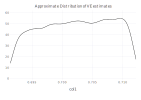

In [17]:
using Gadfly

Gadfly.plot(df, Coord.cartesian(xmin=quantile!(VEs, 0.025), xmax=quantile!(VEs, 0.975)),
    layer(x = "col1", Geom.density , color=[colorant"black"]),
    Guide.title("Approximate Distribution of VE estimates")
)
    #layer(x = "inuidur1", Geom.density , color=[colorant"black"]),

## Pfizer/BNTX Covid-19 RCT

In [18]:
NV_pb =  19965; # number vaccinated
NU_pb =  20172; # number unvaccinated
RV_pb = 9/NV_pb; # average outcome for vaccinated
RU_pb = 169/NU_pb; # average outcome for unvaccinated
VE_pb = (RU_pb - RV_pb)/RU_pb; # vaccine efficacy

In [19]:
# incidence per 100000
Incidence_RV_pb=RV_pb*100000
Incidence_RU_pb=RU_pb*100000

print("Incidence per 100000 among vaccinated:", Incidence_RV_pb, ".         ")

print("Incidence per 100000 among unvaccinated:", Incidence_RU_pb)

Incidence per 100000 among vaccinated:45.07888805409467.         Incidence per 100000 among unvaccinated:837.7949633154868

In [23]:
# treatment effect - estimated reduction in incidence per 100000 people
delta_hat_pb = 100000*(RV-RU)

print("Estimated ATE of occurances per 100,000 is",  delta_hat)

Estimated ATE of occurances per 100,000 is-40.71005489989265

In [24]:
# variance, standard deviation and confidence interval of ATE using that outcomes are Bernoulli

Var_RV_pb = RV_pb*(1-RV_pb)/NV_pb
Var_RU_pb = RU_pb*(1-RU_pb)/NU_pb
Var_delta_hat_pb =  100000^2*(Var_RV_pb + Var_RU_pb)
Std_delta_hat_pb = sqrt(Var_delta_hat_pb)

print("Standard deviation for ATE is ", Std_delta_hat_pb)


Standard deviation for ATE is 65.91015718590171

In [25]:

CI_b_delta_pb = delta_hat_pb -1.96*sqrt(Var_delta_hat_pb)
CI_u_delta_pb = delta_hat_pb +1.96*sqrt(Var_delta_hat_pb)

print("95 % confidence interval of ATE is [", (CI_b_delta_pb), ",", (CI_u_delta_pb), "]" ,".         "  )

print("Overall VE is", VE_pb)

95 % confidence interval of ATE is [-169.89396298425999,88.4738531844747].         Overall VE is0.9461934124362605

In [28]:
# we use an approximate bootstrap to find the VE confidence interval
# using Monte Carlo draws as before

using Random

B = 10000

x_pb = rand(Truncated(Normal(0, 1), 0, 1), B)
y_pb = rand(Truncated(Normal(0, 1), 0, 1), B)


RVs_pb = RV_pb .+ x*((Var_RV_pb)^0.5)
RUs_pb = RU_pb .+ x*((Var_RU_pb)^0.5)
VEs_pb= (RUs_pb - RVs_pb) ./ RUs_pb


CI_VE_L_pb = quantile!(VEs_pb, 0.025)
CI_VE_U_pb = quantile!(VEs_pb, 0.975)

print("95 % confidence interval is [", (CI_VE_L_pb), ",", (CI_VE_U_pb), "]"   )

95 % confidence interval is [0.9337617026958193,0.9458993857236916]

In [30]:
#plot
using Distributions  
using StatsBase
using CSV  
using DataFrames    
a_pb= filter(t ->  quantile!(VEs_pb, 0.025) < t <  quantile!(VEs_pb, 0.975), VEs_pb)
a_pb
summarystats(a_pb)

b_pb=copy(a_pb)
summarystats(b_pb)

Summary Stats:
Length:         9500
Missing Count:  0
Mean:           0.940131
Minimum:        0.933762
1st Quartile:   0.937245
Median:         0.940236
3rd Quartile:   0.943139
Maximum:        0.945899


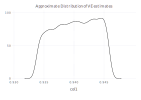

In [31]:
using DataFrames    
df_pb = DataFrame(col1 = b_pb)

using Gadfly

Gadfly.plot(df_pb, Coord.cartesian(xmin=0.93, xmax=0.95),
    layer(x = "col1", Geom.density , color=[colorant"black"]),
    Guide.title("Approximate Distribution of VE estimates")
)

In [32]:
# Here we calculate the overall effectiveness of the vaccine for the two groups that are 65 or older
NV_ =  3239+805;
NU_ =  3255+812;
RV_ = 1/NV_;
RU_ = (14+5)/NU_;
VE_ = (RU_ - RV_)/RU_;

Var_RV_ = RV_*(1-RV_)/NV_
Var_RU_ = RU_*(1-RU_)/NU_

print("Overall VE is ", VE_)


Overall VE is 0.9470690822010516

In [51]:
# As before, we use an approximate bootstrap to find the confidence intervals
# using Monte Carlo draws

using Random

B = 10000

x_ = rand(Truncated(Normal(0, 1), 0, 1), B)
y_ = rand(Truncated(Normal(0, 1), 0, 1), B)


RVs_ = RV_ .+ x_*((Var_RV_)^0.5) 
RUs_ = RU_ .+ x_*((Var_RU_)^0.5) 
VEs_= (RUs_ - RVs_) ./ RUs_


CI_VE_L_ = quantile!(VEs_, 0.025)
CI_VE_U_ = quantile!(VEs_, 0.975)


print("Two-sided 95 % confidence interval is [", (CI_VE_L_), ",", (CI_VE_U_), "]"   )

Two-sided 95 % confidence interval is [0.91482347575321,0.9462378535340233]

In [37]:
CI_VE_one_ = quantile!(VEs_, 0.05)
print("One-sided 95 % confidence interval is [", (CI_VE_one_), " ,1]"   )

One-sided 95 % confidence interval is [0.9157750359853719 ,1]

In [52]:
#plot
using Distributions  
using StatsBase
using CSV  
using DataFrames    
interval= filter(t ->  quantile!(VEs_, 0.025) < t <  quantile!(VEs_, 0.975), VEs_)
interval
summarystats(interval)

b_=copy(interval)
summarystats(b_)

Summary Stats:
Length:         9501
Missing Count:  0
Mean:           0.930696
Minimum:        0.914824
1st Quartile:   0.923225
Median:         0.930692
3rd Quartile:   0.938312
Maximum:        0.946238


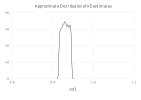

In [54]:
using DataFrames    
df_pfizer = DataFrame(col1 = b_)

using Gadfly

Gadfly.plot(df_pfizer, Coord.cartesian(xmin=0.8, xmax=1.1),
    layer(x = "col1", Geom.density , color=[colorant"black"]),
    Guide.title("Approximate Distribution of VE estimates")
)

Using parametric bootstrap (Bernoulli)


In [55]:
NV_b =  3239+805;
NU_b =  3255+812;
RV_b = 1/NV_b;
RU_b = (14+5)/NU_b;
VE_b = (RU_b - RV_b)/RU_b;

print("Overall VE is ", VE_b)

Overall VE is 0.9470690822010516

In [56]:

using Random

B = 10000

RVs_b=rand(Binomial(NV_b, RV_b),B)  # Binomial distribution for n trials with success rate p
RUs_b = rand(Binomial(NU_b, RU_b),B)

VEs_b = (RUs_b-RVs_b)./ RUs_b

CI_VE_b = quantile!(VEs_b, 0.025)
CI_VE_b = quantile!(VEs_b, 0.975)


print("Two-sided 95 % confidence interval is [", (CI_VE_L_), ",", (CI_VE_U_), "]"   )

Two-sided 95 % confidence interval is [0.91482347575321,0.9462378535340233]

In [57]:
CI_VE_b_1 = quantile!(VEs_b, 0.05)


print("one-sided 95 % confidence interval is [", (CI_VE_b_1), ",",  " 1]"   )

one-sided 95 % confidence interval is [0.8333333333333334, 1]

In [58]:
#plot
using Distributions  
using StatsBase
using CSV  
using DataFrames    
binomial_int= filter(t ->  quantile!(VEs_b, 0.025) < t <  quantile!(VEs_b, 0.975), VEs_b)
binomial_int
summarystats(binomial_int)

binom=copy(binomial_int)
summarystats(binom)

Summary Stats:
Length:         6013
Missing Count:  0
Mean:           0.919473
Minimum:        0.809524
1st Quartile:   0.894737
Median:         0.933333
3rd Quartile:   0.950000
Maximum:        0.975000


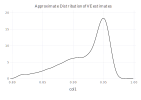

In [59]:
using DataFrames    
df_pfizer_bin = DataFrame(col1 = binom)

using Gadfly

Gadfly.plot(df_pfizer_bin, Coord.cartesian(xmin=0.8, xmax=1),
    layer(x = "col1", Geom.density , color=[colorant"black"]),
    Guide.title("Approximate Distribution of VE estimates")
)